In [3]:
import csv
import requests
from bs4 import BeautifulSoup
from datetime import datetime

In [497]:
## Go on indeed.com and put the jo description and location. Think of the data you want to find


In [498]:
## Copy the url. Create a template where you can insert job position and location

In [499]:
def get_url(position, location):
    template = 'https://in.indeed.com/jobs?q={}&l={}'
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url
    

In [500]:
url = get_url('Salesforce Administrator','India')

In [501]:
## Extract Raw HTML

In [502]:
response = requests.get(url)

In [503]:
response

<Response [200]>

In [504]:
## Response 200 means that it has been successfull

In [505]:
soup = BeautifulSoup(response.text,'html.parser')

In [506]:
cards = soup.find_all("div","jobsearch-SerpJobCard")

In [507]:
len(cards)

15

In [508]:
card = cards[0]

In [509]:
## Get a single record. Go on the job title and RC and inspect element

In [510]:
atag = card.h2.a

In [511]:
atag['title']

'Senior Salesforce Administrator'

In [512]:
## The above works but will stop if there is no value. Hence we will use get method which will simply give a null value if value doesnt exist


In [513]:
job_title = atag.get('title')

In [514]:
print(job_title)

Senior Salesforce Administrator


In [515]:
job_company = card.find('span','company').text.strip()

In [516]:
job_location = card.find('span','location').text.strip()

In [517]:
job_summary = card.find('div','summary').text.strip()

In [518]:
job_post_date = card.find('span', 'date').text
today = datetime.today().strftime('%Y-%m-%d')

In [519]:
## Now if u use text attribute when no text is present an attribute error will occur. Hence we will wrap it in try catch

In [520]:
# this does not exists for all jobs, so handle the exceptions
salary_tag = card.find('span', 'salaryText')
if salary_tag:
    salary = salary_tag.text.strip()
else:
    salary = ''

Generalize the code

In [521]:
def get_record(card):
    job_title = card.h2.a.get('title')
    company = card.find('span', 'company').text.strip()
    job_location = card.find('div', 'recJobLoc').get('data-rc-loc')
    post_date = card.find('span', 'date').text
    today = datetime.today().strftime('%Y-%m-%d')
    summary = card.find('div', 'summary').text.strip().replace('\n', ' ')
    

    # this does not exists for all jobs, so handle the exceptions
    salary_tag = card.find('span', 'salaryText')
    if salary_tag:
        salary = salary_tag.text.strip()
    else:
        salary = ''  
        
    record = (job_title, company, job_location, post_date, today, summary, salary)
    return record

In [522]:
records = []

for card in cards:
    record = get_record(card)
    records.append(record)

In [523]:
records[6]

('Senior Salesforce Administrator',
 'Qualys',
 'Pune, Maharashtra',
 '21 days ago',
 '2021-02-23',
 'We are looking for an experienced Salesforce.com Administrator who has in-depth understanding of the SFDC tool along with experience on working with Business on…',
 '')

Getting to the next Page

In [524]:
## Go on the chevron of next and click on inspect

In [525]:
while True:
    try:
        url = 'https://www.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
    except AttributeError:
        break

    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    cards = soup.find_all('div', 'jobsearch-SerpJobCard')

    for card in cards:
        record = get_record(card)
        records.append(record)

***Adding Everything Up***

In [526]:
import csv
from datetime import datetime
import requests
from bs4 import BeautifulSoup


def get_url(position, location):
    """Generate url from position and location"""
    template = 'https://in.indeed.com/jobs?q={}&l={}'
    position = position.replace(' ', '+')
    location = location.replace(' ', '+')
    url = template.format(position, location)
    return url


def get_record(card):
    """Extract job data from a single record"""
    
    job_title = card.h2.a.get('title')
    company = card.find('span', 'company').text.strip()
    job_location = card.find('div', 'recJobLoc').get('data-rc-loc')
    summary = card.find('div', 'summary').text.strip().replace('\n', ' ')

    # this does not exists for all jobs, so handle the exceptions
    salary_tag = card.find('span', 'salaryText')
    if salary_tag:
        salary = salary_tag.text.strip()
    else:
        salary = ''  
        
    record = (job_title, company, job_location, summary, salary)
    return record


def main(position, location):
    """Run the main program routine"""
    records = []
    url = get_url(position, location)
    
    # extract the job data
    while True:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        cards = soup.find_all('div', 'jobsearch-SerpJobCard')
        for card in cards:
            record = get_record(card)
            records.append(record)
        try:
            url = 'https://in.indeed.com' + soup.find('a', {'aria-label': 'Next'}).get('href')
        except AttributeError:
            break
        
    # save the job data
    with open('Salesforce_Business_Analyst.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['JobTitle', 'Company', 'Location', 'Summary', 'Salary'])
        writer.writerows(records)

In [527]:
# run the main program
main('Salesforce Business Analyst', 'India')

In [528]:
## Getting all dataframes

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [530]:
df_admin = pd.read_csv(r"Salesforce_Administrator.csv")

In [531]:
df_admin.head()

,JobTitle,Company,Location,Summary,Salary
0,Salesforce Administrator,Coupa,"Pune, Maharashtra","Coupa Software (NASDAQ: COUP), a leader in bus...",NaN
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month"
2,Salesforce Administrator,TaskUs,"Indore, Madhya Pradesh",You will work closely with Business Developmen...,NaN
3,Salesforce Administrator,Twilio,"Bengaluru, Karnataka","Because you belong at Twilio. The Who, What, W...",NaN
4,Salesforce Administrator,Unacademy,"Bengaluru, Karnataka",Minimum two years of experience as a Salesforc...,NaN


In [532]:
df_admin.dropna(axis=0, inplace=True)

In [533]:
df_admin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 1 to 318
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  39 non-null     object
 1   Company   39 non-null     object
 2   Location  39 non-null     object
 3   Summary   39 non-null     object
 4   Salary    39 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


In [534]:
df_admin.head()

,JobTitle,Company,Location,Summary,Salary
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month"
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month"
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month"
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year"
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month"


In [535]:
print(df_admin)

                                              JobTitle  \
1              Salesforce Administrator_ Pune Location   
7                   Salesforce Administrator/Developer   
8                   Salesforce Developer/Administrator   
17                              ZOHO CRM Administrator   
18                          Salesforce marketing cloud   
19                                Salesforce Developer   
33                                Salesforce Developer   
39                  Salesforce Developer/Administrator   
45                    Salesforce Developer (4+ Yr exp)   
51                                Salesforce Developer   
57                  Salesforce Developer/Administrator   
58                               Salesforce Consultant   
60                             Email Marketing Manager   
63                           Salesforce ERP Specialist   
69                   sr Salesforce associate developer   
74                          Job Opening for Salesforce   
91            

In [536]:
df_dev = pd.read_csv(r"Salesforce_Developer.csv")

In [537]:
df_dev.dropna(axis=0, inplace=True)

In [538]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 1013
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  248 non-null    object
 1   Company   248 non-null    object
 2   Location  248 non-null    object
 3   Summary   248 non-null    object
 4   Salary    248 non-null    object
dtypes: object(5)
memory usage: 11.6+ KB


In [539]:
df_Architect = pd.read_csv(r"Salesforce_Architect.csv")

In [540]:
df_Architect.dropna(axis=0, inplace=True)

In [541]:
df_Architect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 4 to 556
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  74 non-null     object
 1   Company   74 non-null     object
 2   Location  74 non-null     object
 3   Summary   74 non-null     object
 4   Salary    74 non-null     object
dtypes: object(5)
memory usage: 3.5+ KB


In [542]:
df_manager = pd.read_csv(r"Salesforce_Manage.csv", encoding='cp1252')

In [543]:
df_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  1010 non-null   object
 1   Company   1010 non-null   object
 2   Location  1010 non-null   object
 3   Summary   1010 non-null   object
 4   Salary    115 non-null    object
dtypes: object(5)
memory usage: 39.6+ KB


In [544]:
df_manager.dropna(axis=0, inplace=True)

In [545]:
df_manager.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 2 to 987
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  115 non-null    object
 1   Company   115 non-null    object
 2   Location  115 non-null    object
 3   Summary   115 non-null    object
 4   Salary    115 non-null    object
dtypes: object(5)
memory usage: 5.4+ KB


In [546]:
df_BA = pd.read_csv(r"Salesforce_BA.csv", encoding='cp1252')

In [547]:
df_BA.dropna(inplace = True, axis =0)

In [548]:
df_BA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 1 to 543
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  33 non-null     object
 1   Company   33 non-null     object
 2   Location  33 non-null     object
 3   Summary   33 non-null     object
 4   Salary    33 non-null     object
dtypes: object(5)
memory usage: 1.5+ KB


In [549]:
## Get all dataframes together

In [550]:
df = pd.concat([df_admin,df_manager,df_dev,df_Architect,df_BA], axis =0).drop_duplicates()

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1 to 543
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   JobTitle  426 non-null    object
 1   Company   426 non-null    object
 2   Location  426 non-null    object
 3   Summary   426 non-null    object
 4   Salary    426 non-null    object
dtypes: object(5)
memory usage: 20.0+ KB


In [552]:
df.value_counts()

JobTitle                                                Company                                        Location                     Summary                                                                                                                                                            Salary                        
sr Salesforce associate developer                       ANI Calls India Private Limited                Mumbai, Maharashtra          Ten years of overall IT experience. 2 to 3 years' Experience as a Salesforce Technical Lead or Senior Developer in a fast-paced environment.                       ₹9,00,000 - ₹14,00,000 a year     1
MuleSoft Developer                                      Vibrantzz Management Services                  Bengaluru, Karnataka         Mulesoft Developer required for International IT Company. Candidate with Graduate from IT Background can apply for this job. Should have Mule ESB experience.      ₹10,00,000 - ₹15,00,000 a year    1
MuleSoft Lea

In [553]:
df.shape

(426, 5)

In [554]:
### Format the salary

In [555]:
df.head()

,JobTitle,Company,Location,Summary,Salary
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month"
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month"
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month"
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year"
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month"


In [556]:
df['monthly'] = df['Salary'].apply(lambda x: 1 if 'a month' in x.lower() else 0)

In [557]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
       
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","").replace('?','').replace(' ?','')
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","").replace('?','').replace('an hour','')
       
    return row


df = df.apply(format_salary, axis=1) 



In [558]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,50000,90000
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,30000,60000
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,25000,60000
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,75000,75000


In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 1 to 543
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   JobTitle    426 non-null    object
 1   Company     426 non-null    object
 2   Location    426 non-null    object
 3   Summary     426 non-null    object
 4   Salary      426 non-null    object
 5   monthly     426 non-null    int64 
 6   salary_min  426 non-null    object
 7   salary_max  426 non-null    object
dtypes: int64(1), object(7)
memory usage: 30.0+ KB


In [560]:
def salary_multiply(row):
    monthly = row["monthly"] 
    if monthly == True:
        
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
       
    return row


df = df.apply(salary_multiply, axis=1) 

In [561]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,600000,1080000
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,360000,720000
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,300000,720000
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,900000,900000


In [562]:
def salary_tax(row):
    if (int(row["salary_min"]) > 500000) & (int(row["salary_min"]) < 800000):
        row["salary_min"] = int(row["salary_min"])*1.25
        
    elif (int(row["salary_min"]) > 800000):
            row["salary_min"] = int(row["salary_min"])*1.43
            
    return row

df = df.apply(salary_tax, axis=1) 

In [563]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,750000,1080000
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,360000,720000
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,300000,720000
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,1.287e+06,900000


In [564]:
def salary_tax_max(row):
    if (int(row["salary_max"]) > 500000) & (int(row["salary_max"]) < 800000):
        row["salary_max"] = int(row["salary_max"])*1.25
        
    elif (int(row["salary_max"]) > 800000):
            row["salary_max"] = int(row["salary_max"])*1.43
            
    return row

df = df.apply(salary_tax_max, axis=1) 

In [565]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,750000,1.5444e+06
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,360000,900000
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,300000,900000
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,1.287e+06,1.287e+06


In [572]:
df['salary_max'].value_counts()

3575000.0     87
2002000.0     24
2288000.0     23
2860000.0     16
1430000.0     15
              ..
825000.0       1
 250000        1
 25001         1
2050027.98     1
 450000        1
Name: salary_max, Length: 97, dtype: int64

In [573]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator_ Pune Location,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,750000,1.5444e+06
7,Salesforce Administrator/Developer,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,360000,900000
8,Salesforce Developer/Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,300000,900000
17,ZOHO CRM Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,1.287e+06,1.287e+06


** Change the job title 

In [577]:
df.loc[df['JobTitle'].str.contains('Admin'), 'JobTitle'] = 'Salesforce Administrator'

In [578]:
df.head()

,JobTitle,Company,Location,Summary,Salary,monthly,salary_min,salary_max
1,Salesforce Administrator,Spadeworx software Services,"Pune, Maharashtra",Basic knowledge of salesforce development (Ape...,"₹50,000 - ₹90,000 a month",1,750000,1.5444e+06
7,Salesforce Administrator,221 B Baker ST,"Salt Lake City, West Bengal",Develop customized solutions within the Salesf...,"₹30,000 - ₹60,000 a month",1,360000,900000
8,Salesforce Administrator,Appletech,"Vadodara, Gujarat",3+ years of Salesforce application experience....,"₹25,000 - ₹60,000 a month",1,300000,900000
17,Salesforce Administrator,Elegant International,"Jaipur, Rajasthan",The CRM administrator will normally report to ...,"₹15,000 - ₹25,000 a year",0,15000,25000
18,Salesforce marketing cloud,GeniusU Web Services pvt ltd,"Mumbai, Maharashtra",Work alongside the Salesforce administrator to...,"₹75,000 a month",1,1.287e+06,1.287e+06


In [579]:
df.loc[df['JobTitle'].str.contains('Developer'), 'JobTitle'] = 'Salesforce Developer'

In [580]:
df.loc[df['JobTitle'].str.contains('Architect'), 'JobTitle'] = 'Salesforce Technical Architect'

In [581]:
df.loc[df['JobTitle'].str.contains('Manager'), 'JobTitle'] = 'Salesforce Technical/Proect Manager'

In [582]:
df.loc[df['JobTitle'].str.contains('Analyst'), 'JobTitle'] = 'Salesforce Business Analyst'

In [584]:
df.loc[df['JobTitle'].str.contains('developer'), 'JobTitle'] = 'Salesforce Developer'

**** Get Clean Data

In [613]:
df_clean1 = pd.read_csv(r"Salesforce_clean_data.csv")

In [614]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  356 non-null    int64  
 1   JobTitle    356 non-null    object 
 2   Company     356 non-null    object 
 3   Location    356 non-null    object 
 4   Summary     356 non-null    object 
 5   Salary      356 non-null    object 
 6   monthly     356 non-null    int64  
 7   salary_min  356 non-null    float64
 8   salary_max  356 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 25.2+ KB


***Experience Calculation

In [625]:
df_clean1["salary_avg"] = (df_clean1["salary_min"] + df_clean1["salary_max"])/2

In [626]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  356 non-null    int64  
 1   JobTitle    356 non-null    object 
 2   Company     356 non-null    object 
 3   Location    356 non-null    object 
 4   Summary     356 non-null    object 
 5   Salary      356 non-null    object 
 6   monthly     356 non-null    int64  
 7   salary_min  356 non-null    float64
 8   salary_max  356 non-null    float64
 9   salary_avg  356 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 27.9+ KB


In [639]:
def experience(row):
    avg = row["salary_avg"]
    if row['JobTitle'] == 'Salesforce Developer':
        if (int(row["salary_avg"]) <= 500000):
            row["Experience"] = 2
        elif (int(row["salary_avg"]) > 500000) & (int(row["salary_avg"]) <= 1500000):
            row["Experience"] = 5
        elif (int(row["salary_avg"]) > 1500000):
            row["Experience"] = 8
    elif row['JobTitle'] == 'Salesforce Administrator':
        if (int(row["salary_avg"]) <= 400000):
            row["Experience"] = 2
        elif (int(row["salary_avg"]) > 400000) & (int(row["salary_avg"]) <= 1000000):
            row["Experience"] = 5
        elif (int(row["salary_avg"]) > 1000000):
            row["Experience"] = 8
    elif row['JobTitle'] == 'Salesforce Business Analyst':
        if (int(row["salary_avg"]) <= 500000):
            row["Experience"] = 2
        elif (int(row["salary_avg"]) > 500000) & (int(row["salary_avg"]) <= 1300000):
            row["Experience"] = 5
        elif (int(row["salary_avg"]) > 1300000):
            row["Experience"] = 8
    elif row['JobTitle'] == 'Salesforce Technical Architect':
        if (int(row["salary_avg"]) <= 1500000):
            row["Experience"] = 7
        elif (int(row["salary_avg"]) > 1500000):
            row["Experience"] = 10
    elif row['JobTitle'] == 'Salesforce Technical/Proect Manager':
        if (int(row["salary_avg"]) <= 2000000):
            row["Experience"] = 8
        elif (int(row["salary_avg"]) > 2000000):
            row["Experience"] = 10    
    return row
  
    

df_clean1 = df_clean1.apply(experience, axis=1)

In [640]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Company     356 non-null    object 
 1   Experience  356 non-null    int64  
 2   JobTitle    356 non-null    object 
 3   Location    356 non-null    object 
 4   Salary      356 non-null    object 
 5   Summary     356 non-null    object 
 6   Unnamed: 0  356 non-null    int64  
 7   monthly     356 non-null    int64  
 8   salary_avg  356 non-null    float64
 9   salary_max  356 non-null    float64
 10  salary_min  356 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 30.7+ KB


*** Location

In [641]:
df_clean1["Location"].value_counts()

Bengaluru, Karnataka                     85
Chennai, Tamil Nadu                      43
Hyderabad, Telangana                     35
Mumbai, Maharashtra                      32
Pune, Maharashtra                        26
Noida, Uttar Pradesh                     23
India                                    11
Remote                                    9
Ahmedabad, Gujarat                        8
Jaipur, Rajasthan                         8
Mohali, Punjab                            8
Indore, Madhya Pradesh                    6
Delhi, Delhi                              5
Vadodara, Gujarat                         5
Coimbatore, Tamil Nadu                    4
Kolkata, West Bengal                      3
Kochi, Kerala                             3
Thiruvananthapuram, Kerala                3
Salt Lake City, West Bengal               3
Gurgaon, Haryana                          2
Raj Bhavan Road, Hyderabad, Telangana     2
Alwal, Hyderabad, Telangana               2
Hospet, Karnataka               

In [657]:
def format_location(row):
    location = row["Location"]
    if "," in location:
        split = location.split(",")
        city = split[0]
        state = split[1]
       
    else:
        city = location
        state = location
    
    row["City"] = city
    row["State"] = state
    
       
    return row


df_clean1 = df_clean1.apply(format_location, axis=1) 

In [658]:
df_clean1.head()

,Company,Experience,JobTitle,Location,Salary,Summary,Unnamed: 0,monthly,salary_avg,salary_max,salary_min,City,State
0,Spadeworx software Services,5,Salesforce Developer,"Pune, Maharashtra","₹50,000 - ₹90,000 a month",Basic knowledge of salesforce development (Ape...,1,1,1147200.0,1544400.0,750000.0,Pune,Maharashtra
1,221 B Baker ST,5,Salesforce Administrator,"Salt Lake City, West Bengal","₹30,000 - ₹60,000 a month",Develop customized solutions within the Salesf...,7,1,630000.0,900000.0,360000.0,Salt Lake City,West Bengal
2,Appletech,5,Salesforce Administrator,"Vadodara, Gujarat","₹25,000 - ₹60,000 a month",3+ years of Salesforce application experience....,8,1,600000.0,900000.0,300000.0,Vadodara,Gujarat
3,Elegant International,2,Salesforce Administrator,"Jaipur, Rajasthan","₹15,000 - ₹25,000 a year",The CRM administrator will normally report to ...,17,0,20000.0,25000.0,15000.0,Jaipur,Rajasthan
4,GeniusU Web Services pvt ltd,5,Salesforce Developer,"Mumbai, Maharashtra","₹75,000 a month",Work alongside the Salesforce administrator to...,18,1,1287000.0,1287000.0,1287000.0,Mumbai,Maharashtra


In [659]:
df_clean1.to_csv("test2.csv")

In [668]:
df_clean2 = pd.read_csv(r"test2.csv")

In [669]:
df_clean2.head()

,Unnamed: 0,Company,Experience,JobTitle,Location,Salary,Summary,monthly,salary_avg,salary_max,salary_min,City,State
0,0,Spadeworx software Services,5,Salesforce Developer,"Pune, Maharashtra","₹50,000 - ₹90,000 a month",Basic knowledge of salesforce development (Ape...,1,1147200.0,1544400.0,750000.0,Pune,Maharashtra
1,1,221 B Baker ST,5,Salesforce Administrator,"Salt Lake City, West Bengal","₹30,000 - ₹60,000 a month",Develop customized solutions within the Salesf...,1,630000.0,900000.0,360000.0,Kolkata,West Bengal
2,2,Appletech,5,Salesforce Administrator,"Vadodara, Gujarat","₹25,000 - ₹60,000 a month",3+ years of Salesforce application experience....,1,600000.0,900000.0,300000.0,Ahmedabad,Gujarat
3,3,Elegant International,2,Salesforce Administrator,"Jaipur, Rajasthan","₹15,000 - ₹25,000 a year",The CRM administrator will normally report to ...,0,20000.0,25000.0,15000.0,Gurgaon,Rajasthan
4,4,GeniusU Web Services pvt ltd,5,Salesforce Developer,"Mumbai, Maharashtra","₹75,000 a month",Work alongside the Salesforce administrator to...,1,1287000.0,1287000.0,1287000.0,Mumbai,Maharashtra


In [670]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  356 non-null    int64  
 1   Company     356 non-null    object 
 2   Experience  356 non-null    int64  
 3   JobTitle    356 non-null    object 
 4   Location    356 non-null    object 
 5   Salary      356 non-null    object 
 6   Summary     356 non-null    object 
 7   monthly     356 non-null    int64  
 8   salary_avg  356 non-null    float64
 9   salary_max  356 non-null    float64
 10  salary_min  356 non-null    float64
 11  City        356 non-null    object 
 12  State       356 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 36.3+ KB


In [671]:
df_clean2 = df_clean2[df_clean2["salary_avg"] > 300000]

In [672]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 355
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  309 non-null    int64  
 1   Company     309 non-null    object 
 2   Experience  309 non-null    int64  
 3   JobTitle    309 non-null    object 
 4   Location    309 non-null    object 
 5   Salary      309 non-null    object 
 6   Summary     309 non-null    object 
 7   monthly     309 non-null    int64  
 8   salary_avg  309 non-null    float64
 9   salary_max  309 non-null    float64
 10  salary_min  309 non-null    float64
 11  City        309 non-null    object 
 12  State       309 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 33.8+ KB


*** The data has been Cleaned!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [673]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309 entries, 0 to 355
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  309 non-null    int64  
 1   Company     309 non-null    object 
 2   Experience  309 non-null    int64  
 3   JobTitle    309 non-null    object 
 4   Location    309 non-null    object 
 5   Salary      309 non-null    object 
 6   Summary     309 non-null    object 
 7   monthly     309 non-null    int64  
 8   salary_avg  309 non-null    float64
 9   salary_max  309 non-null    float64
 10  salary_min  309 non-null    float64
 11  City        309 non-null    object 
 12  State       309 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 33.8+ KB


** Lets do more cleaning!!!!!!!!!!!!! 

#parsing of job description (python, etc.)

In [716]:
df_clean2['development'] = df_clean2['Summary'].apply(lambda x: 1 if 'development' in x.lower() else 0)
print(df_clean2['development'].value_counts())
df_clean2['Configuration'] = df_clean2['Summary'].apply(lambda x: 1 if 'config' in x.lower() else 0)
print(df_clean2['Configuration'].value_counts())
df_clean2['Business_Interaction'] = df_clean2['Summary'].apply(lambda x: 1 if 'requirement' in x.lower() else 0)
print(df_clean2['Business_Interaction'].value_counts())
df_clean2['Functional'] = df_clean2['Summary'].apply(lambda x: 1 if 'function' in x.lower() else 0)
print(df_clean2['Functional'].value_counts())
df_clean2['Lead_team'] = df_clean2['Summary'].apply(lambda x: 1 if 'lead' in x.lower() else 0)
print(df_clean2['Lead_team'].value_counts())



0    233
1     76
Name: development, dtype: int64
0    286
1     23
Name: Configuration, dtype: int64
0    273
1     36
Name: Business_Interaction, dtype: int64
0    286
1     23
Name: Functional, dtype: int64
0    268
1     41
Name: Lead_team, dtype: int64


In [717]:
df_clean2.head()

,Unnamed: 0,Company,Experience,JobTitle,Location,Salary,Summary,monthly,salary_avg,salary_max,...,Testing,Client,Configuration,Business,lightning,apex,development,Business_Interaction,Functional,Lead_team
0,0,Spadeworx software Services,5,Salesforce Developer,"Pune, Maharashtra","₹50,000 - ₹90,000 a month",Basic knowledge of salesforce development (Ape...,1,1147200.0,1544400.0,...,0,0,0,0,0,0,1,0,0,0
1,1,221 B Baker ST,5,Salesforce Administrator,"Salt Lake City, West Bengal","₹30,000 - ₹60,000 a month",Develop customized solutions within the Salesf...,1,630000.0,900000.0,...,0,0,0,1,0,0,0,1,1,0
2,2,Appletech,5,Salesforce Administrator,"Vadodara, Gujarat","₹25,000 - ₹60,000 a month",3+ years of Salesforce application experience....,1,600000.0,900000.0,...,0,0,0,0,0,0,0,0,0,0
4,4,GeniusU Web Services pvt ltd,5,Salesforce Developer,"Mumbai, Maharashtra","₹75,000 a month",Work alongside the Salesforce administrator to...,1,1287000.0,1287000.0,...,0,0,0,0,0,0,0,0,0,0
5,5,Cloudy Wave Technology Pvt Ltd,5,Salesforce Developer,"Pune, Maharashtra","₹2,00,000 - ₹7,00,000 a year",We are looking for strong Salesforce experienc...,0,537500.0,875000.0,...,0,0,0,0,0,0,0,0,0,0


# #EDA

In [720]:
df_clean2.to_csv("Final_dataset.csv")

In [6]:
df = pd.read_csv(r"Final_dataset.csv")

<AxesSubplot:>

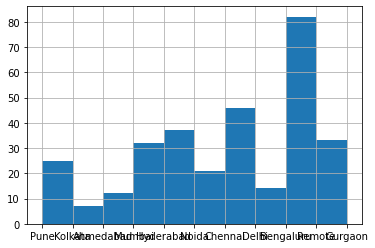

In [7]:
df.City.hist()

<AxesSubplot:>

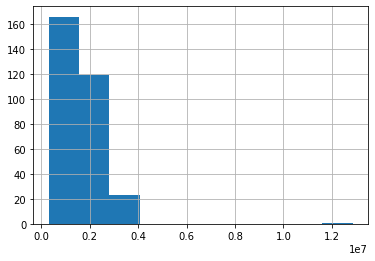

In [8]:
df.salary_avg.hist()

<AxesSubplot:>

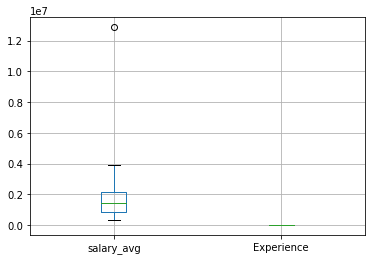

In [9]:
df.boxplot(column = ['salary_avg','Experience'])

In [10]:
df[['salary_avg','Experience']].corr()

,salary_avg,Experience
salary_avg,1.000000,0.654844
Experience,0.654844,1.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company', 'Experience', 'JobTitle',
       'salary_avg', 'Salary', 'Summary', 'monthly', 'Unnamed: 9',
       'salary_max', 'salary_min', 'City', 'State', 'Lightning', 'LWC',
       'Triggers', 'Test_Classes', 'JavaScript', 'Testing', 'Client',
       'Configuration', 'Business', 'lightning', 'apex', 'development',
       'Business_Interaction', 'Functional', 'Lead_team'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            309 non-null    int64  
 1   Unnamed: 0.1          309 non-null    int64  
 2   Company               309 non-null    object 
 3   Experience            309 non-null    int64  
 4   JobTitle              309 non-null    object 
 5   salary_avg            309 non-null    float64
 6   Salary                309 non-null    object 
 7   Summary               309 non-null    object 
 8   monthly               309 non-null    int64  
 9   Unnamed: 9            0 non-null      float64
 10  salary_max            309 non-null    float64
 11  salary_min            309 non-null    float64
 12  City                  309 non-null    object 
 13  State                 309 non-null    object 
 14  Lightning             309 non-null    int64  
 15  LWC                   3

In [13]:
df_cat = df[['JobTitle','City','development','Business_Interaction',
       'Functional', 'Lead_team','Configuration']].corr()

In [14]:
df_cat

,development,Business_Interaction,Functional,Lead_team,Configuration
development,1.000000,-0.066858,-0.133330,-0.134776,-0.133330
Business_Interaction,-0.066858,1.000000,0.012313,-0.142035,0.012313
Functional,-0.133330,0.012313,1.000000,-0.038228,0.060505
Lead_team,-0.134776,-0.142035,-0.038228,1.000000,0.070809
Configuration,-0.133330,0.012313,0.060505,0.070809,1.000000


In [15]:
import seaborn as sns

graph for development: total = 5


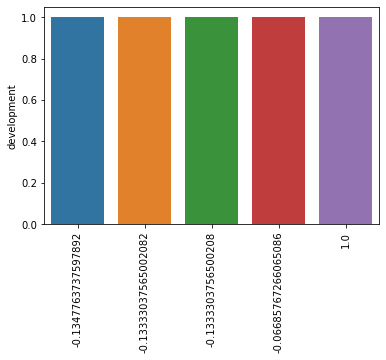

graph for Business_Interaction: total = 5


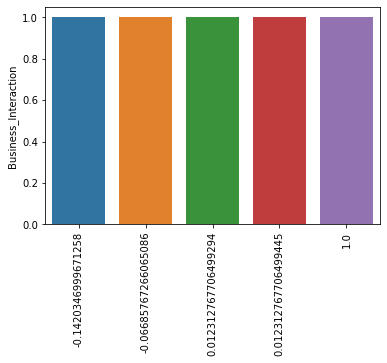

graph for Functional: total = 5


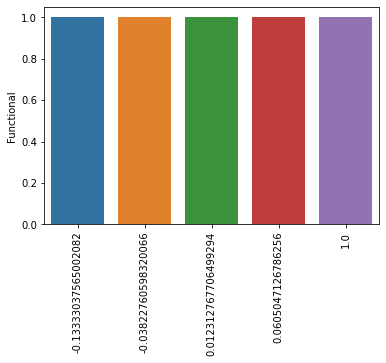

graph for Lead_team: total = 5


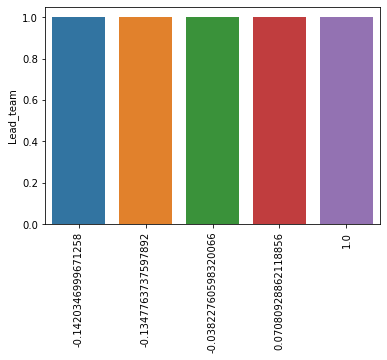

graph for Configuration: total = 5


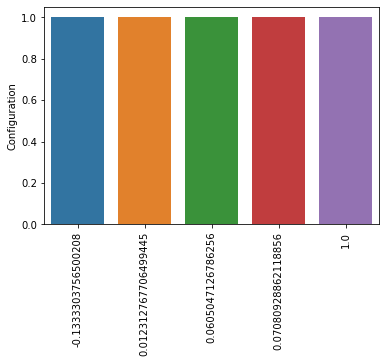

In [16]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [17]:
pd.pivot_table(df, index = 'JobTitle', values = 'salary_avg')

,salary_avg
JobTitle,
Salesforce Administrator,9.867180e+05
Salesforce Business Analyst,8.432676e+05
Salesforce Developer,1.566923e+06
Salesforce Technical Architect,2.158556e+06
Salesforce Technical/Proect Manager,2.002707e+06


In [18]:
df['salary_avg']

0      1147200.0
1       630000.0
2       600000.0
3      1287000.0
4       537500.0
         ...    
304    2502500.0
305    1430000.0
306    3003000.0
307    3432000.0
308    1322500.0
Name: salary_avg, Length: 309, dtype: float64

In [19]:
pd.pivot_table(df, index = ['City','JobTitle'], values = 'salary_avg').sort_values('JobTitle', ascending = False)

salary_avg
City      JobTitle                                         
Noida     Salesforce Technical/Proect Manager  2.168833e+06
Mumbai    Salesforce Technical/Proect Manager  1.263000e+06
Ahmedabad Salesforce Technical/Proect Manager  8.000000e+05
Hyderabad Salesforce Technical/Proect Manager  8.595000e+05
Gurgaon   Salesforce Technical/Proect Manager  1.410667e+06
Bengaluru Salesforce Technical/Proect Manager  2.482111e+06
Delhi     Salesforce Technical/Proect Manager  2.240333e+06
Chennai   Salesforce Technical/Proect Manager  2.394400e+06
          Salesforce Technical Architect       2.530520e+06
Hyderabad Salesforce Technical Architect       2.189557e+06
Noida     Salesforce Technical Architect       1.587167e+06
Delhi     Salesforce Technical Architect       2.502500e+06
Mumbai    Salesforce Technical Architect       2.077750e+06
Bengaluru Salesforce Technical Architect       2.096248e+06
Pune      Salesforce Technical Architect       2.502500e+06
Chennai   Salesforce Developer                 1.364221e+06
Mumbai    Salesforce Developer                 1.800808e+06
Delhi     Salesforce Developer                 2.030600e+06
Pune      Salesforce Developer                 2.386679e+06
Gurgaon   Salesforce Developer                 1.083822e+06
Bengaluru Salesforce Developer                 1.756209e+06
Noida     Salesforce Developer                 1.392207e+06
Hyderabad Salesforce Developer                 1.536653e+06
Ahmedabad Salesforce Developer                 9.511050e+05
Kolkata   Salesforce Developer                 6.808833e+05
Remote    Salesforce Developer                 1.162474e+06
Pune      Salesforce Business Analyst          1.116875e+06
Noida     Salesforce Business Analyst          3.200000e+05
Remote    Salesforce Business Analyst          5.883333e+05
Hyderabad Salesforce Business Analyst          8.412500e+05
Mumbai    Salesforce Business Analyst          9.481000e+05
Ahmedabad Salesforce Business Analyst          5.916667e+05
Gurgaon   Salesforce Business Analyst          4.950000e+05
Delhi     Salesforce Business Analyst          7.771667e+05
Chennai   Salesforce Business Analyst          7.550000e+05
Bengaluru Salesforce Business Analyst          1.061833e+06
Mumbai    Salesforce Administrator             1.162500e+06
Kolkata   Salesforce Administrator             6.300000e+05
Hyderabad Salesforce Administrator             3.017880e+05
Pune      Salesforce Administrator             1.147200e+06
Chennai   Salesforce Administrator             1.100625e+06
Remote    Salesforce Administrator             3.060000e+05
Bengaluru Salesforce Administrator             1.228125e+06
Ahmedabad Salesforce Administrator             6.000000e+05

# Model Building

In [20]:
# choose relevant columns 

In [21]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Company', 'Experience', 'JobTitle',
       'salary_avg', 'Salary', 'Summary', 'monthly', 'Unnamed: 9',
       'salary_max', 'salary_min', 'City', 'State', 'Lightning', 'LWC',
       'Triggers', 'Test_Classes', 'JavaScript', 'Testing', 'Client',
       'Configuration', 'Business', 'lightning', 'apex', 'development',
       'Business_Interaction', 'Functional', 'Lead_team'],
      dtype='object')

In [22]:
df_model = df[['salary_avg','Experience','JobTitle','City','development','Lead_team','Functional','Business_Interaction','Configuration']]

In [23]:
# get dummy data 

In [24]:
df_dum = pd.get_dummies(df_model)

In [25]:
# train test split 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df_dum.drop('salary_avg', axis=1)
y = df_dum.salary_avg.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# multiple linear regression 
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     14.11
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.65e-32
Time:                        00:17:45   Log-Likelihood:                -4616.5
No. Observations:                 309   AIC:                             9275.
Df Residuals:                     288   BIC:                             9353.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         -4.94e+05   1.43e+05     -3.446      0.001   -7.76e+05   -2.12e+05
Experience                                    3.075e+05   2.64e+04     11.668      0.000    2.56e+05    3.59e+05
development                                  -3.752e+04    1.1e+05     -0.340      0.734   -2.54e+05    1.79e+05
Lead_team                                    -7.301e+04   1.37e+05     -0.532      0.595   -3.43e+05    1.97e+05
Functional                                   -2.281e+05   1.75e+05     -1.305      0.193   -5.72e+05    1.16e+05
Business_Interaction                          2.334e+05    1.5e+05      1.556      0.121   -6.18e+04    5.29e+05
Configuration                                -4713.1087   1.78e+05     -0.027      0.979   -3.54e+05    3.45e+05
JobTitle_Salesforce Administrator            -2.248e+05   1.72e+05     -1.304      0.193   -5.64e+05    1.15e+05
JobTitle_Salesforce Business Analyst          -2.71e+04   1.28e+05     -0.211      0.833    -2.8e+05    2.26e+05
JobTitle_Salesforce Developer                 1.311e+05   7.38e+04      1.776      0.077   -1.42e+04    2.76e+05
JobTitle_Salesforce Technical Architect      -2.305e+05   1.43e+05     -1.608      0.109   -5.13e+05    5.17e+04
JobTitle_Salesforce Technical/Proect Manager -1.426e+05   1.52e+05     -0.935      0.350   -4.43e+05    1.57e+05
City_Ahmedabad                               -2.158e+05   2.13e+05     -1.011      0.313   -6.36e+05    2.04e+05
City_Bengaluru                                6.663e+04   1.01e+05      0.661      0.509   -1.32e+05    2.65e+05
City_Chennai                                  3872.1333   1.19e+05      0.033      0.974    -2.3e+05    2.38e+05
City_Delhi                                   -3.998e+04   2.07e+05     -0.193      0.847   -4.48e+05    3.68e+05
City_Gurgaon                                 -1.978e+05   1.88e+05     -1.052      0.294   -5.68e+05    1.72e+05
City_Hyderabad                               -7.842e+04   1.33e+05     -0.591      0.555    -3.4e+05    1.83e+05
City_Kolkata                                 -3.524e+05   2.76e+05     -1.276      0.203   -8.96e+05    1.91e+05
City_Mumbai                                  -8.213e+04   1.41e+05     -0.582      0.561    -3.6e+05    1.96e+05
City_Noida                                   -1.009e+05   1.64e+05     -0.614      0.540   -4.24e+05    2.23e+05
City_Pune                                     5.285e+05   1.55e+05      3.416      0.001    2.24e+05    8.33e+05
City_Remote                                  -2.548e+04   1.81e+05     -0.141      0.888   -3.82e+05    3.31e+05
==============================================================================
Omnibus:                      500.610   Durbin-Watson:            

In [29]:
# Use cross validation
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-452250.93908938096

In [30]:
## Hence we are off by a value of close to 4.5 lacs

In [31]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32022056816625.023, tolerance: 29657360261.343533
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830479230020.258, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29288975890076.742, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_des

-452250.49380193255

In [32]:
# lets try diferent values of alpha and see which works best for us

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830423228743.46, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29288899898638.758, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356681356214.5742, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_desc

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356694834878.6914, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830479230020.258, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29288975890076.742, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_des

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289044758773.188, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356709514097.129, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830534547255.42, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_desce

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289125164141.17, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356725384827.4727, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830593708120.68, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_desce

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830652073458.617, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289210563436.5, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356742439086.9258, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_desce

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356759454811.7227, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830718429740.562, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289300691800.367, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_des

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356775220533.7188, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830775081619.094, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289377655832.703, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_des

C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1356792161937.8398, tolerance: 11595975481.473267
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24830835202066.867, tolerance: 23381130848.221928
  model = cd_fast.enet_coordinate_descent(
C:\Users\akkhanvilkar\Downloads\WPy64-3870\python-3.8.7.amd64\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29289459349213.266, tolerance: 24239509430.6581
  model = cd_fast.enet_coordinate_des

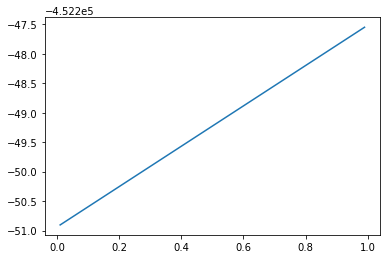

In [33]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [34]:
# Finding perfect value of alpha
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-452247.548054


In [35]:
# lasso regression again
lm_l = Lasso(alpha=99)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-451729.5971984376

In [36]:
# random forest (we expect this too work well as its a tree based decision model and here we have lot of 0 and 1 values)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-453403.4679968455

In [37]:
# tune models GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=20)

In [38]:
gs.best_score_

-371559.6957414169

In [39]:
gs.best_estimator_

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=20)

In [40]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

313262.6832881948

In [42]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

list(X_test.iloc[1,:])

[5, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]